In [32]:
import csv
import numpy as np
import copy
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

X = []
y = []

type_map = {
    'Link': 0,
    'Status': 1,
    'Photo': 2,
    'Video': 3
}

with open('2.2 facebook_train.csv') as csv_file:
    csv_reader = csv.reader(csv_file)
    next(csv_reader, None)
    
    for row in csv_reader:
        row_cpy = copy.deepcopy(row[:-3])
        row_cpy[1] = type_map[row_cpy[1]]
        
        X.append(list(map(lambda x: int(x), row_cpy)))
        y.append(int(row_cpy[-2]))
        
X = np.array(X)
y = np.array(y)

In [33]:
import pandas as pd

fb = pd.read_csv('2.2 facebook_train.csv')
c_type = pd.get_dummies(fb['type'])
fb = pd.concat([fb, c_type], axis=1, sort=False)
fb.head()

,total_followers,type,category,month,weekday,hour,paid,comment,like,share,Link,Photo,Status,Video
0,124050,Photo,3,6,4,17,1,3,77,16,0,1,0,0
1,132556,Photo,2,8,3,24,0,11,313,50,0,1,0,0
2,92786,Photo,2,2,6,17,1,2,145,39,0,1,0,0
3,135632,Photo,1,9,2,1,0,2,299,49,0,1,0,0
4,139540,Link,1,12,3,17,1,7,229,21,1,0,0,0


In [34]:
X = fb.drop(['type', 'comment','like','share'], axis=1)
y = fb['share']

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4)

regr = linear_model.LinearRegression()
regr.fit(X_train, y_train)
y_predict = regr.predict(X_test)
print(regr.coef_)

[ 6.39186436e-04  9.70883462e+00 -3.05553632e+00  9.19668157e-01
  2.07739392e-01  1.35597487e+01 -1.44529717e+01 -2.90138139e+00
  1.40458441e+00  1.59497687e+01]


In [44]:
X_train.shape

(238, 10)

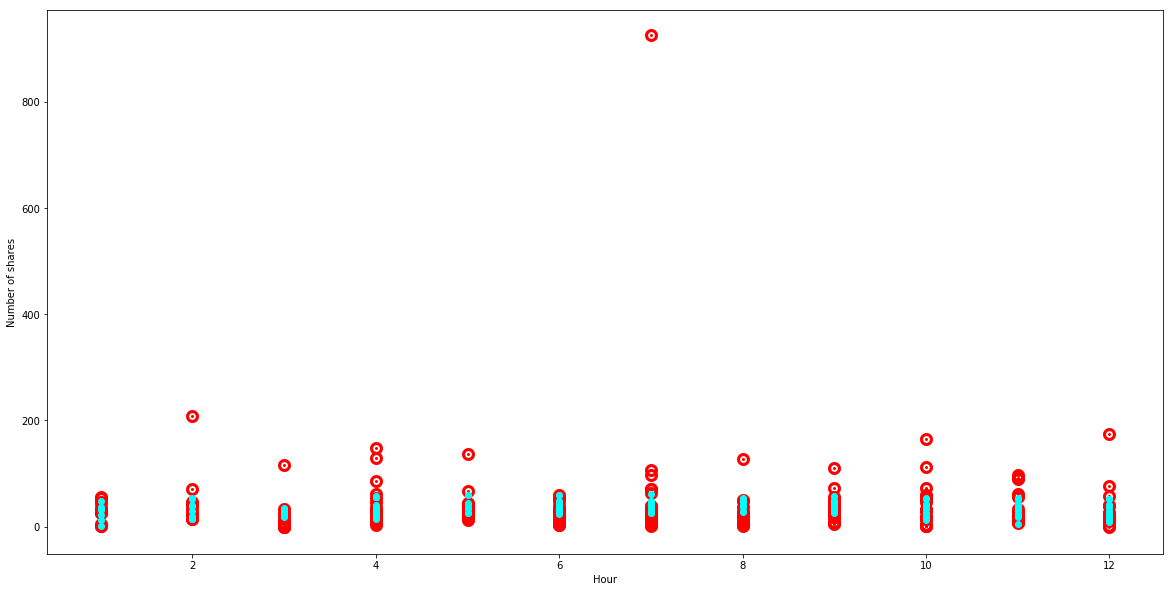

In [45]:
from matplotlib import pyplot as plt

X_train.shape

plt.figure(figsize=(20,10))
plt.scatter(X_train['month'], y_train, color="red", marker=".", linewidth=10)
plt.scatter(X_test['month'], y_predict, color="aqua")
plt.xlabel("Hour")
plt.ylabel("Number of shares")
plt.show()

In [59]:
fb_X = []
fb_y = []

with open('2.2 facebook_test.csv') as csv_file:
    csv_reader = csv.reader(csv_file)
    next(csv_reader, None)
    
    for row in csv_reader:
        row_cpy = copy.deepcopy(row[:-3])
        row_cpy[1] = type_map[row_cpy[1]]
        
        fb_X.append(list(map(lambda x: int(x), row_cpy)))
        fb_y.append(int(row_cpy[-2]))
        
fb_X = np.array(fb_X)
fb_y = np.array(fb_y)

In [61]:
from sklearn.metrics import mean_squared_error, r2_score

fb_y_pred = regr.predict(fb_X)
print("Mean squared error: %.2f" % mean_squared_error(fb_y, fb_y_pred), "pts²")
print('Variance score: %.2f' % r2_score(fb_y, fb_y_pred))

Mean squared error: 0.00 pts²
Variance score: 1.00


In [ ]:
with open('2.2 facebook_train.csv') as csv_file:
    csv_reader = csv.reader(csv_file)
    next(csv_reader, None)
    
    for row in csv_reader:
        row_cpy = row[:-3] + row()
        row_cpy[1] = type_map[row_cpy[1]]
        
        X.append(list(map(lambda x: int(x), row_cpy)))
        y.append(int(row_cpy[-2]))
        
X1 = np.array(X)
y1 = np.array(y)



In [69]:
!pip install pandas

  Using cached https://files.pythonhosted.org/packages/78/78/50ef81a903eccc4e90e278a143c9a0530f05199f6221d2e1b21025852982/pandas-0.23.4-cp36-cp36m-macosx_10_6_intel.macosx_10_9_intel.macosx_10_9_x86_64.macosx_10_10_intel.macosx_10_10_x86_64.whl
You are using pip version 18.1, however version 19.0 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [70]:
import pandas

c_train = pandas.read_csv("2.2 casualty_train.csv")
c_test = pandas.read_csv("2.2 casualty_test.csv")

print(c_train.head())
print(len(c_train))
print(len(c_test))


# clean data
# drop 16225 observation that don't have age
c_train = c_train[c_train["age"] != "Unknown"]
c_test = c_test[c_test["age"] != "Unknown"]

# severe
c_train.loc[c_train["severe"] == False, "severe"] = 0
c_train.loc[c_train["severe"] == True, "severe"] = 1

c_test.loc[c_test["severe"] == False, "severe"] = 0
c_test.loc[c_test["severe"] == True, "severe"] = 1

c_train = pandas.get_dummies(c_train, dummy_na=True, columns=["casualty_class", "gender", "pedestrian_location", "pedestrian_movement", "travel"])
c_test = pandas.get_dummies(c_test, dummy_na=True, columns=["casualty_class", "gender", "pedestrian_location", "pedestrian_movement", "travel"])
# # convert the text categories to int labels

print(c_train.head())


FileNotFoundError: File b'2.2 casualty_test.csv' does not exist

In [64]:
!pip install pandas



    100% |████████████████████████████████| 14.7MB 331kB/s 
    100% |████████████████████████████████| 512kB 2.4MB/s 
^C


In [ ]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size = 0.4)
clf = svm.SVC(kernel='linear', C=1).fit(X1_train, y1_train)